## Import libraries

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import ETFs as etfs

Total number of ETFs: 33


## Prepare the data

In [5]:
tickers = etfs.etfs
today = pd.Timestamp.today().strftime('%Y-%m-%d')

start_date = "2012-01-01"
end_date = "2025-3-31"

data_download = yf.download(tickers=tickers, start = start_date, end = end_date)
data_long = data_download.stack(level=1).reset_index()
display(data_long)


C:\Users\Shelly\AppData\Local\Temp\ipykernel_15100\1323271818.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_download = yf.download(tickers=tickers, start = start_date, end = end_date)
[*********************100%***********************]  33 of 33 completed
C:\Users\Shelly\AppData\Local\Temp\ipykernel_15100\1323271818.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_long = data_download.stack(level=1).reset_index()


Price,Date,Ticker,Close,High,Low,Open,Volume
0,2012-01-03,CORN,42.619999,42.990002,42.180000,42.730000,114100.0
1,2012-01-03,DBO,26.042213,26.094877,25.770118,25.796449,318300.0
2,2012-01-03,EWA,12.307325,12.368639,12.234864,12.240437,2787500.0
3,2012-01-03,EWC,20.625572,20.648155,20.384690,20.437383,6790400.0
4,2012-01-03,EWG,14.720882,14.838239,14.706213,14.742887,3892700.0
...,...,...,...,...,...,...,...
100493,2025-03-28,VDNR.L,136.095001,138.505005,136.065002,137.910004,31820.0
100494,2025-03-28,VGK,70.980003,71.260002,70.820000,71.190002,6081100.0
100495,2025-03-28,VNQ,89.709999,90.279999,89.129997,90.120003,3602900.0
100496,2025-03-28,VPL,73.000000,73.500000,72.830002,73.279999,419300.0


## Reset the index

In [6]:
data = data_long.copy()
print(data.columns.tolist())
data.set_index('Date', inplace=True)
display(data)
data.to_csv("assets_original.csv", index=False)

['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']


Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03,CORN,42.619999,42.990002,42.180000,42.730000,114100.0
2012-01-03,DBO,26.042213,26.094877,25.770118,25.796449,318300.0
2012-01-03,EWA,12.307325,12.368639,12.234864,12.240437,2787500.0
2012-01-03,EWC,20.625572,20.648155,20.384690,20.437383,6790400.0
2012-01-03,EWG,14.720882,14.838239,14.706213,14.742887,3892700.0
...,...,...,...,...,...,...
2025-03-28,VDNR.L,136.095001,138.505005,136.065002,137.910004,31820.0
2025-03-28,VGK,70.980003,71.260002,70.820000,71.190002,6081100.0
2025-03-28,VNQ,89.709999,90.279999,89.129997,90.120003,3602900.0


## Prepare the data with only the name and Close price 

Price,Ticker,Close
Date,,
2012-01-03,CORN,42.619999
2012-01-03,DBO,26.042213
2012-01-03,EWA,12.307325
2012-01-03,EWC,20.625572
2012-01-03,EWG,14.720882
...,...,...
2025-03-28,VDNR.L,136.095001
2025-03-28,VGK,70.980003
2025-03-28,VNQ,89.709999


<Axes: xlabel='Date'>

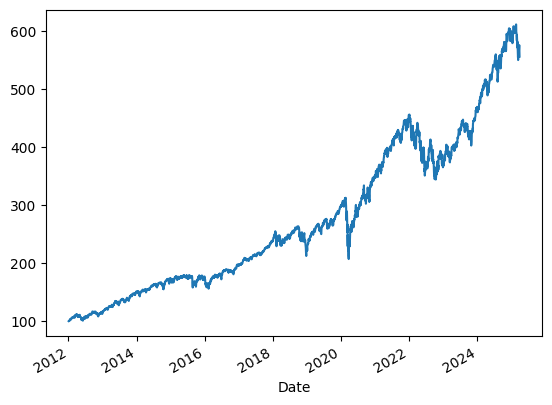

In [7]:
data_close = data[['Ticker', 'Close']].copy()
display(data_close)

# Take one ETF for checking
data_close[data_close['Ticker'] == 'SPY']['Close'].plot()

## Change the dataframe pivot as the columns are each ticker's closing prices

In [11]:
close_wide = data_close.pivot(columns='Ticker', values='Close')
display(close_wide)
close_wide.to_csv('assets_wide_NAN.csv', index=True)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,42.619999,26.042213,NaN,NaN,12.307325,20.625572,14.720882,...,28.830000,100.450653,83.888611,317.519989,69.905632,NaN,27.664728,34.591946,33.707802,6.78375
2012-01-04,NaN,NaN,NaN,42.509998,26.165096,NaN,NaN,12.452251,20.587934,14.581520,...,28.389999,100.608246,82.891197,318.160004,70.114937,NaN,27.328697,34.000519,33.888031,6.69750
2012-01-05,NaN,NaN,NaN,41.509998,25.814005,NaN,NaN,12.290601,20.459967,14.412820,...,28.510000,100.876122,82.743683,313.359985,69.817909,NaN,26.831099,34.319889,33.472141,6.68250
2012-01-06,NaN,NaN,NaN,41.349998,25.919331,NaN,NaN,12.128963,20.249189,14.148768,...,27.910000,100.616127,83.396904,313.760010,69.392517,NaN,26.462748,34.207520,33.070122,6.72625
2012-01-09,NaN,NaN,NaN,42.189999,25.831560,NaN,NaN,12.167977,20.309418,14.207448,...,28.129999,100.860359,83.249397,312.640015,69.655846,NaN,26.663082,34.089230,33.097836,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,88.790054,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,88.780167,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.196602,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [9]:
data_fill_minus_one = close_wide.copy()
data_fill_minus_one.fillna(-1, inplace=True)
data_fill_minus_one.to_csv('assets_wide_fill_minus_one.csv', index=True)

In [10]:
close_wide = close_wide.ffill().bfill()
close_wide = close_wide.dropna()
close_wide.to_csv('assets_filled.csv', index=True)